<a href="https://colab.research.google.com/github/MMS-1017/IBM-Final-Project/blob/main/ML_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(0)

In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

In [3]:
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_3.csv')
Y = data['Class'].to_numpy()
Y[:10]

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [6]:
# Standardize the data in X then reassign it to the variable X
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)
#split the data X and Y into training and test data.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
Y_test.shape

(18,)

In [8]:
#Create a logistic regression object then create a GridSearchCV object
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}
lr = LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)
GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})
#We display the best parameters using the data attribute and the accuracy on the validation data.
print("tuned hpyerparameters :(best parameters) ", logreg_cv.best_params_)
print("accuracy :", logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


In [9]:
acc_logreg_test_data = logreg_cv.score(X_test, Y_test)
print("Accuracy on test data :", acc_logreg_test_data)

Accuracy on test data : 0.8333333333333334


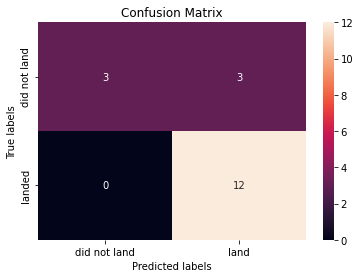

In [10]:
yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [11]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(svm, parameters ,cv=10)
svm_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [12]:
print("tuned hpyerparameters :(best parameters) ", svm_cv.best_params_)
print("accuracy :", svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


In [13]:
#Calculate the accuracy on the test data
acc_svm_test_data = svm_cv.score(X_test, Y_test)
print("Accuracy on test data :", acc_svm_test_data)

Accuracy on test data : 0.8333333333333334


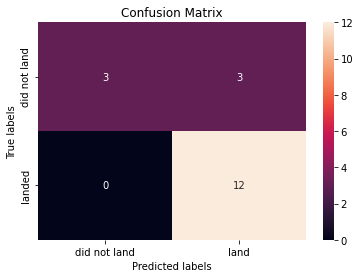

In [14]:
yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

In [16]:
#Create a decision tree classifier object then create a GridSearchCV object
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)

In [17]:
print("tuned hyperparameters :(best parameters) ", tree_cv.best_params_)
print("accuracy :", tree_cv.best_score_)

tuned hyperparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.8767857142857143


In [18]:
#measure the accuracy
acc_tree_test_data = tree_cv.score(X_test, Y_test)
print("Accuracy on test data :", acc_tree_test_data)

Accuracy on test data : 0.7777777777777778


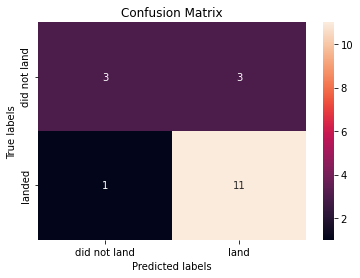

In [19]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

In [20]:
#Create a k nearest neighbors object then create a GridSearchCV object
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}
KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, parameters, scoring='accuracy', cv=10)
knn_cv = knn_cv.fit(X_train, Y_train)
print("tuned hpyerparameters :(best parameters) ", knn_cv.best_params_)
print("accuracy :", knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


In [21]:
#Calculate the accuracy of tree_cv on the test data using the method score:
acc_knn_test_data = knn_cv.score(X_test, Y_test)
print("Accuracy on test data :", acc_knn_test_data)

Accuracy on test data : 0.8333333333333334


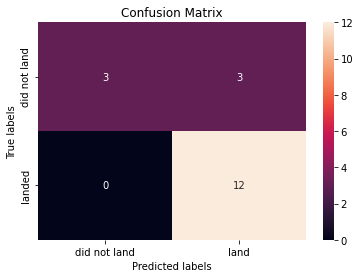

In [22]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

In [23]:
#Find the method performs best:

methods = ['Logreg','Svm','Tree','Knn']
accs_train = [logreg_cv.best_score_, svm_cv.best_score_, tree_cv.best_score_, knn_cv.best_score_]
accs_test = [acc_logreg_test_data, acc_svm_test_data, acc_tree_test_data, acc_knn_test_data]

dict_meth_accs = {}

for i in range(len(methods)):
    dict_meth_accs[methods[i]] = [accs_train[i], accs_test[i]]

df = pd.DataFrame.from_dict(dict_meth_accs, orient='index')
df.rename(columns={0: 'Accuracy Train', 1: 'Accuracy Test'}, inplace = True)

df.head()

,Accuracy Train,Accuracy Test
Logreg,0.846429,0.833333
Svm,0.848214,0.833333
Tree,0.876786,0.777778
Knn,0.848214,0.833333


In [24]:
df_sorted_train = df.sort_values(by = ['Accuracy Train'], ascending=False) 
df_sorted_train

,Accuracy Train,Accuracy Test
Tree,0.876786,0.777778
Knn,0.848214,0.833333
Svm,0.848214,0.833333
Logreg,0.846429,0.833333


In [25]:
df_sorted_test = df.sort_values(by = ['Accuracy Test'], ascending=False) 
df_sorted_test

,Accuracy Train,Accuracy Test
Logreg,0.846429,0.833333
Svm,0.848214,0.833333
Knn,0.848214,0.833333
Tree,0.876786,0.777778


In [26]:
df_sorted_test[['Accuracy Test']]

,Accuracy Test
Logreg,0.833333
Svm,0.833333
Knn,0.833333
Tree,0.777778


Text(0.5, 1.0, 'Methods performance on train data')

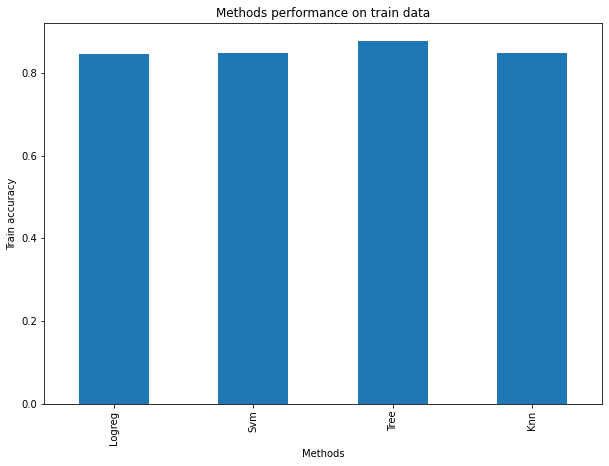

In [28]:
acc_train_methods = df["Accuracy Train"]
ax = acc_train_methods.plot(kind='bar', figsize=(10, 7))
ax.set_xlabel("Methods")
ax.set_ylabel("Train accuracy")
ax.set_title("Methods performance on train data")

(0.8, 0.9)

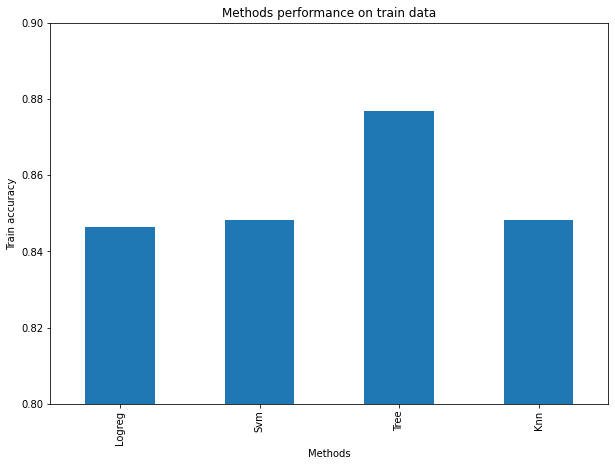

In [29]:
#We zoom in to see the results better
acc_train_methods = df["Accuracy Train"]
ax = acc_train_methods.plot(kind='bar', figsize=(10, 7))
ax.set_xlabel("Methods")
ax.set_ylabel("Train accuracy")
ax.set_title("Methods performance on train data")
ax.set_ylim(ymin=0.8, ymax=0.9)

Text(0.5, 1.0, 'Methods performance on test data')

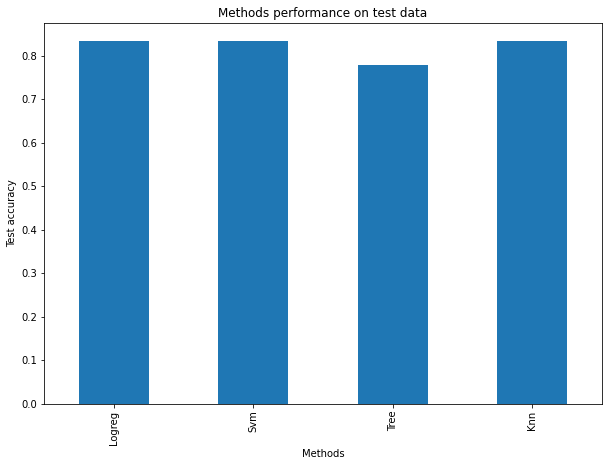

In [30]:
acc_train_methods = df["Accuracy Test"]
ax = acc_train_methods.plot(kind='bar', figsize=(10, 7))
ax.set_xlabel("Methods")
ax.set_ylabel("Test accuracy")
ax.set_title("Methods performance on test data")
